<a href="https://colab.research.google.com/github/aSafarpoor/Seminar/blob/main/simple_Cf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
from tqdm import tqdm
import random
from collections import Counter
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive
%cd MyDrive
%cd Seminar
!ls

/content/drive
/content/drive/MyDrive
/content/drive/MyDrive/Seminar
AMAZON_FASHION.json	     ml-1m.test.negative  runs
AMAZON_FASHION.json.gz	     ml-1m.test.rating	  test.csv
embedded_text.p		     ml-1m.train.rating   train.csv
meta_AMAZON_FASHION.json     model.bin		  train.gsheet
meta_AMAZON_FASHION.json.gz  model_plot.png	  user_item_matrix.p
meta_data.p		     models		  user_tweets.p


In [ ]:
tweets = []
for line in open('AMAZON_FASHION.json', 'r'):
    tweets.append(json.loads(line))

In [ ]:
len(tweets) , '\n' , tweets[0]

(883636,
 '\n',
 {'asin': '7106116521',
  'overall': 5.0,
  'reviewText': 'Exactly what I needed.',
  'reviewTime': '10 20, 2014',
  'reviewerID': 'A1D4G1SNUZWQOT',
  'reviewerName': 'Tracy',
  'summary': 'perfect replacements!!',
  'unixReviewTime': 1413763200,
  'verified': True})

In [ ]:
df = pd.DataFrame(tweets)

In [ ]:
df = df[['asin','overall','reviewerID']]

In [ ]:
df

,asin,overall,reviewerID
0,7106116521,5.0,A1D4G1SNUZWQOT
1,7106116521,2.0,A3DDWDH9PX2YX2
2,7106116521,4.0,A2MWC41EW7XL15
3,7106116521,2.0,A2UH2QQ275NV45
4,7106116521,3.0,A89F3LQADZBS5
...,...,...,...
883631,B01HJHTH5U,5.0,A1ZSB2Q144UTEY
883632,B01HJHTH5U,5.0,A2CCDV0J5VB6F2
883633,B01HJHTH5U,3.0,A3O90PACS7B61K
883634,B01HJHF97K,3.0,A2HO94I89U3LNH


In [ ]:
users=list(set(df.reviewerID))
items=list(set(df.asin))
print(' users:',len(users),'\n items:',len(items),'\n relations:',len(df),'\n','sparsity percentage:',
      round(len(df)/(len(users)*len(items))*100,5),'\n','mean degree for users:',round(len(df)/len(users),3),
      '\n','mean degree for users:',round(2*len(df)/(len(users)+len(items)),3))

 users: 749233 
 items: 186189 
 relations: 883636 
 sparsity percentage: 0.00063 
 mean degree for users: 1.179 
 mean degree for users: 1.889


In [ ]:
def item2id_convertor(items):
    d = {}
    c = 0
    for i in items:
        d[i]=c
        d[c]=i
        c+=1
    return d

ditem = item2id_convertor(items)

In [ ]:
threshold = 2

In [ ]:
dicuseritem = {}
for row in tqdm(df.iterrows()):
    i = row[1].asin
    u = row[1].reviewerID
    i_id = ditem[i]
    r = row[1].overall

    if r>=threshold:
        if u in dicuseritem:
            dicuseritem[u].append(i_id)
        else:
            dicuseritem[u]=[i_id]

883636it [01:41, 8697.10it/s] 


In [ ]:
def cosine_similarity(a,b):
    l = len(a)
    c = 0
    for i in a:
        if i in b:
            c+=1
    return(c*1000/l)

1 --> 579559
2 --> 62240
3 --> 11435
4 --> 4435
5 --> 1415
6 --> 632
7 --> 312
8 --> 463
9 --> 114


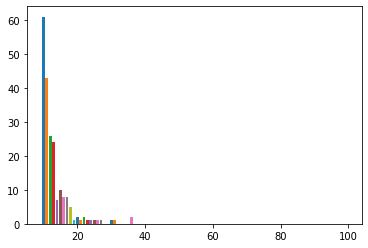

In [ ]:
h = np.zeros(1000)
for row in dicuseritem.values():
    h[len(row)]+=1

for i in range(1,10):
    print(i,'-->',int(h[i]))

for c in range(10,100):
    plt.bar(c,h[c])

In [ ]:
def recmmender(u1,users,dicuseritem):
    most_similar_user = -1
    max_similarity_score = -1

    if u1 not in dicuseritem:
        print("cold-start\n")
        return ""

    u1sorteditemlist = dicuseritem[u1][:]
    u1sorteditemlist.sort()

    for user in users:
        if u1 == user:
            continue
        try:
            temp = dicuseritem[user][:]
            temp.sort()
            if u1sorteditemlist == dicuseritem[user]:
                continue
            score = cosine_similarity(u1sorteditemlist,dicuseritem[user])
            if score > max_similarity_score:
                max_similarity_score = score
                most_similar_user = user
        except:
            pass

    return max_similarity_score,user

In [ ]:
most_simialr = []
for u in tqdm(users[:10]):
    most_simialr.append(recmmender(u,users,dicuseritem))

 70%|███████   | 7/10 [00:09<00:03,  1.26s/it]

cold-start



100%|██████████| 10/10 [00:12<00:00,  1.24s/it]


In [ ]:
for i in most_simialr:
    print(i)

(0.0, 'A30UUHRQUEXNLL')
(1000.0, 'A30UUHRQUEXNLL')
(1000.0, 'A30UUHRQUEXNLL')
(0.0, 'A30UUHRQUEXNLL')
(1000.0, 'A30UUHRQUEXNLL')
(1000.0, 'A30UUHRQUEXNLL')
(0.0, 'A30UUHRQUEXNLL')

(1000.0, 'A30UUHRQUEXNLL')
(1000.0, 'A30UUHRQUEXNLL')
